## HOMEWORK 1 

In [1]:
## Loading Libraries
from numpy.random import seed
seed(1)
#from tensorflow import set_random_seed
#set_random_seed(2)
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

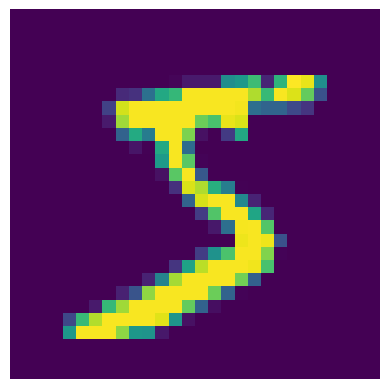

In [4]:
some_digit = x_train[0]
plt.imshow(some_digit)
plt.axis('off')
plt.show()

In [5]:
y_train[0]

5

## The last two digits of my student ID are 3 and 6. 

In [6]:
# filter out the training and test sets with these two digits - 3 and 6
x_train = x_train[(y_train == 3) | (y_train == 6)]
y_train = y_train[(y_train == 3) | (y_train == 6)]
x_test = x_test[(y_test == 3) | (y_test == 6)]
y_test = y_test[(y_test == 3) | (y_test == 6)]

In [7]:
# For binary classification modify labels: Label encoding [3 => 0 and 6 => 1] 
y_train = np.where(y_train == 3, 0, 1)
y_test = np.where(y_test == 3, 0, 1)

Label is:  0


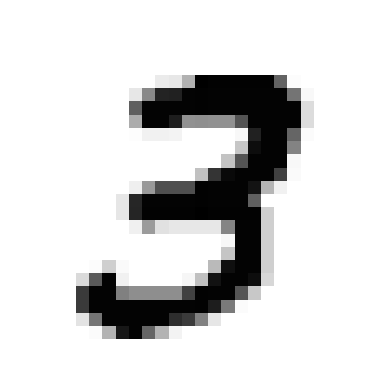

In [8]:
print("Label is: ", y_train[0])
some_digit = x_train[0]
plt.imshow(some_digit, cmap='Greys')
plt.axis('off')
plt.show()

Label is:  1


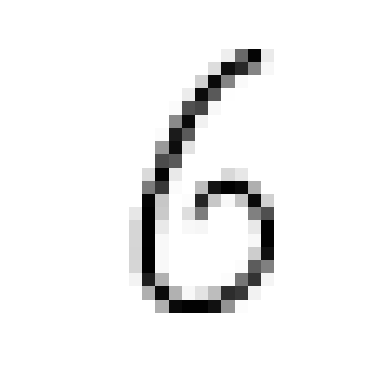

In [9]:
print("Label is: ", y_train[4])
some_digit = x_train[4]
plt.imshow(some_digit, cmap = 'Greys') # In grey scale
plt.axis('off')
plt.show()

In [10]:
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((12049, 28, 28), (12049,), (1968, 28, 28), (1968,))

In [11]:
x_train[0],y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
         105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
           0

In [12]:
y_train[0]

0

In [13]:
# Pixel values range from 0 to 255. Normalize pixel values of train and test to the range [0, 1] 
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
x_train[0] # Normalized x_train 

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Neural Network for Binary Classification

In [15]:
# Batch size and Learning rate are hyperparameters 
batch_size = 32
learning_rate = 0.001

In [16]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) ## 28x28 pixels are converted to 1D 784 input units. 
model.add(Dense(128,activation='relu')) # 128 nodes with ReLU activation to add non-linearity.
model.add(Dense(1,activation='sigmoid')) ## 1 output node for binary classication using sigmoid.

In [17]:
model.summary() 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


## Params in the second layer are 100480 because 784 inputs * 128 nodes(weights = 100352) + 128(baises) = 100480
## Params in the last layer = 129 because 128(wts) + 1(bias) = 129

### Binary_Crossentropy is used for binary classification and optimization is chosen as Adam

In [18]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy',metrics=['accuracy']) 

### Early stopping criteria based on validation loss


In [19]:
# Early stopping criteria based on validation loss
# patience = Number of epochs with no improvement after which training will be stopped.
# restore_best_weights = Whether to restore model weights from the epoch with the best value of the monitored quantity.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [20]:
# Training the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=20, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
302/302 [==============================] - 1s 2ms/step - loss: 0.0344 - accuracy: 0.9899 - val_loss: 0.0086 - val_accuracy: 0.9975
Epoch 2/20
302/302 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0055 - val_accuracy: 0.9979
Epoch 3/20
302/302 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0045 - val_accuracy: 0.9979
Epoch 4/20
302/302 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9997 - val_loss: 0.0021 - val_accuracy: 0.9996
Epoch 5/20
302/302 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0082 - val_accuracy: 0.9967
Epoch 6/20
302/302 [==============================] - 0s 1ms/step - loss: 6.8038e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 0.9996
Epoch 7/20
302/302 [==============================] - 0s 2ms/step - loss: 3.2874e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 0.999

In [21]:
y_pred = model.predict(x_test)

62/62 [==============================] - 0s 820us/step


In [22]:
y_pred

array([[1.0000000e+00],
       [2.2597467e-06],
       [1.0000000e+00],
       ...,
       [1.0000000e+00],
       [2.4903650e-16],
       [1.0000000e+00]], dtype=float32)

In [23]:
y_test

array([1, 0, 1, ..., 1, 0, 1])

In [24]:
## changing shape of array as same as y_test
y_pred = y_pred.flatten()

In [25]:
## changing form of y_pred as same as y_test
y_pred = np.round(y_pred)

In [26]:
y_pred

array([1., 0., 1., ..., 1., 0., 1.], dtype=float32)

## The following code is taken from and modified according to my requirement: 
https://dev.mrdbourke.com/tensorflow-deep-learning/02_neural_network_classification_in_tensorflow/

In [27]:
def draw_confusion_matrix(y_test, y_preds,initializer):
    # Note: The following confusion matrix code is a remix of Scikit-Learn's 
    # plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
    # and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
    import itertools

    figsize = (8, 8)

    # Create the confusion matrix
    cm = confusion_matrix(y_test, tf.round(y_preds))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
    fig.colorbar(cax)

    # Create classes
    classes = False

    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title=initializer,
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.title.set_size(20)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
               horizontalalignment="center",
               color="white" if cm[i, j] > threshold else "black",
               size=15)

### Construct a confusion matrix

Confusion Matrix:
[[1009    1]
 [   1  957]]


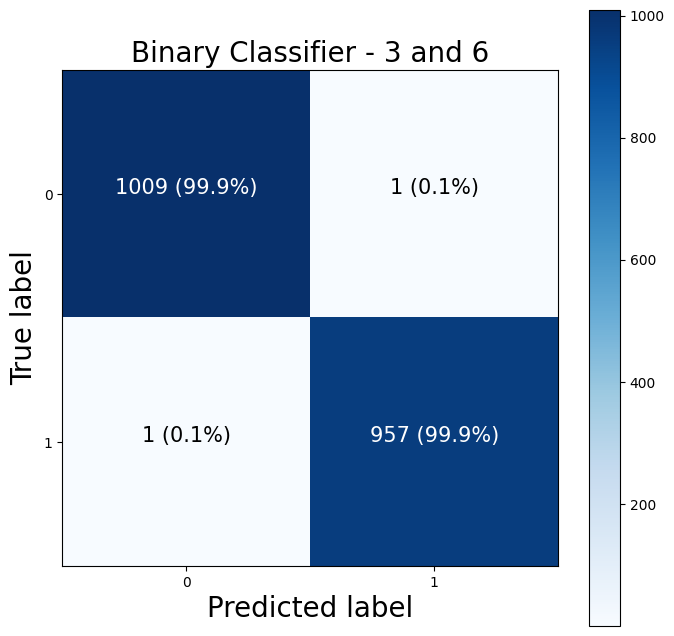

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
draw_confusion_matrix(y_test, y_pred,"Binary Classifier - 3 and 6")

### Model Evaluation

In [29]:
# calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9989837398373984

In [30]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

62/62 [==============================] - 0s 869us/step - loss: 0.0024 - accuracy: 0.9990
Test Accuracy: 0.9989837408065796


### Learning Curve - Loss and Accuracy

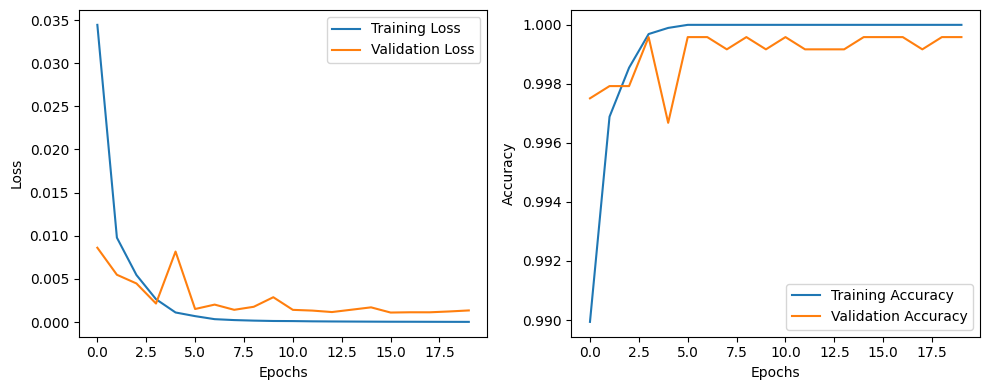

In [31]:
# Present the learning curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Show some examples of predictions

1/1 [==============================] - 0s 16ms/step


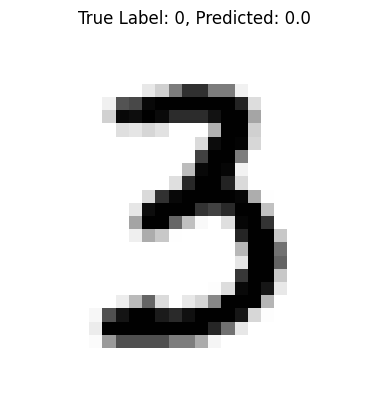

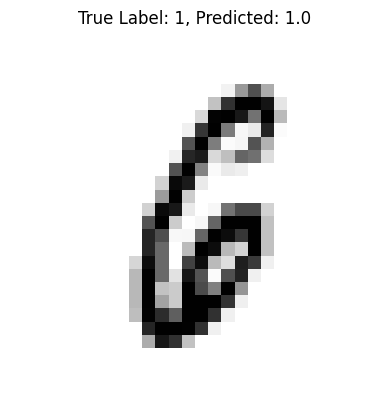

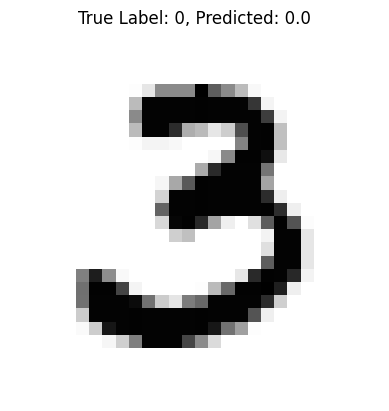

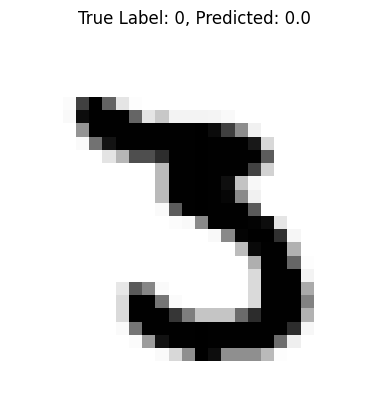

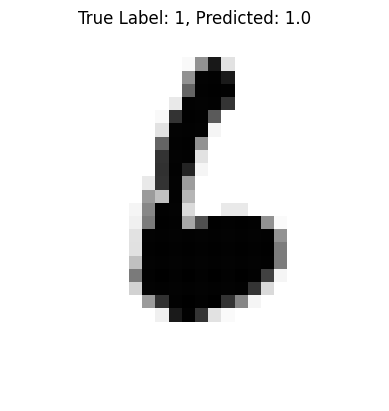

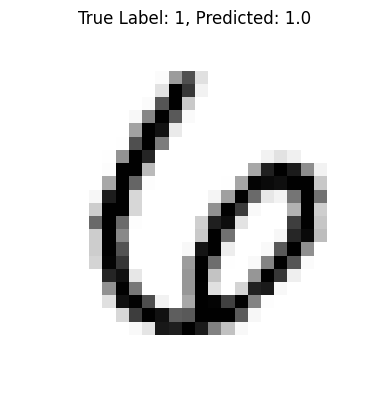

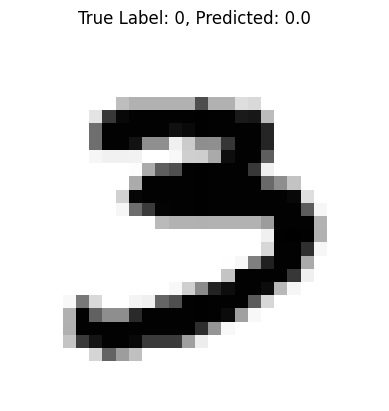

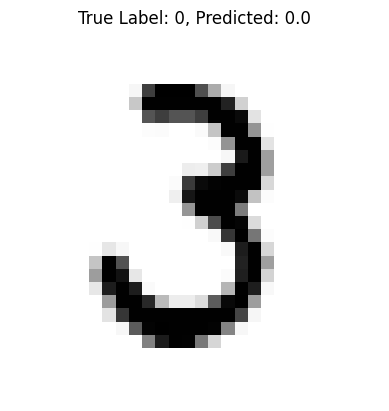

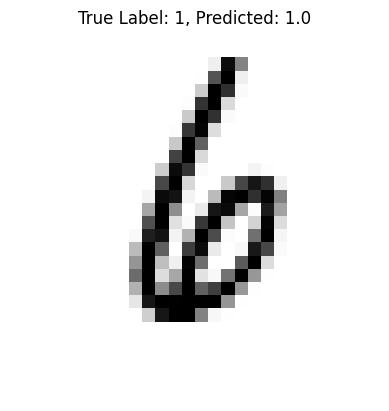

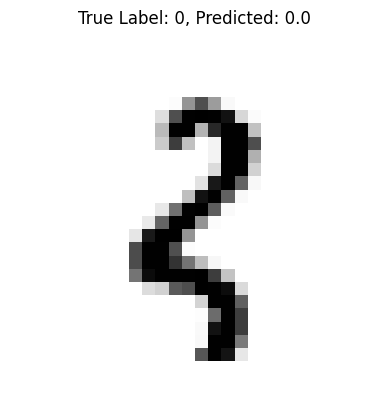

In [32]:

eg_indices = np.random.choice(len(x_test), 10) # 10 randomly selected samples
eg_images = x_test[eg_indices]
eg_labels = y_test[eg_indices]
eg_predictions = model.predict(eg_images)
for i in range(len(eg_images)):
    plt.figure()
    plt.imshow(eg_images[i], cmap='Greys')
    plt.title(f"True Label: {eg_labels[i]}, Predicted: {np.round(eg_predictions[i][0])}")
    plt.axis('off')

## B. Three different Weight Initializers. As per keras documentation there are multiple initializers such as He normal, GlorotNormal, RandomNormal, and GlorotUniform.

In [33]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal,GlorotUniform


In [34]:
# Load MNIST dataset and select digits 3 and 6
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[(y_train == 3) | (y_train == 6)]
y_train = y_train[(y_train == 3) | (y_train == 6)]
x_test = x_test[(y_test == 3) | (y_test == 6)]
y_test = y_test[(y_test == 3) | (y_test == 6)]

In [35]:
# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [36]:

# Create binary labels (0 for 3, 1 for 6)
y_train = np.where(y_train == 3, 0, 1)
y_test = np.where(y_test == 3, 0, 1)

In [37]:
# Initialize weight initializers
initializers = [GlorotNormal(seed=1), HeNormal(seed=2), RandomNormal(mean=0.0, stddev=0.1, seed=3), GlorotUniform(seed=4)]


In [38]:
# Lists to store results
learning_curves = []
accuracies = []

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________
62/62 [==============================] - 0s 738us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                     

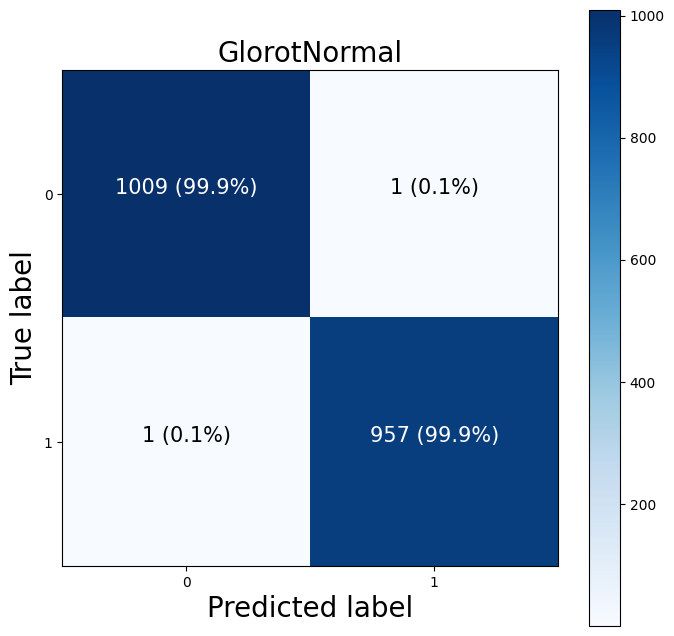

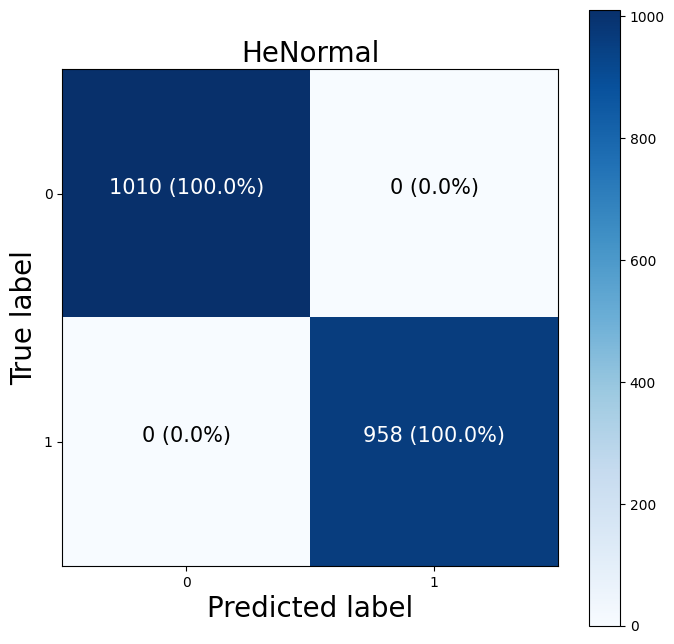

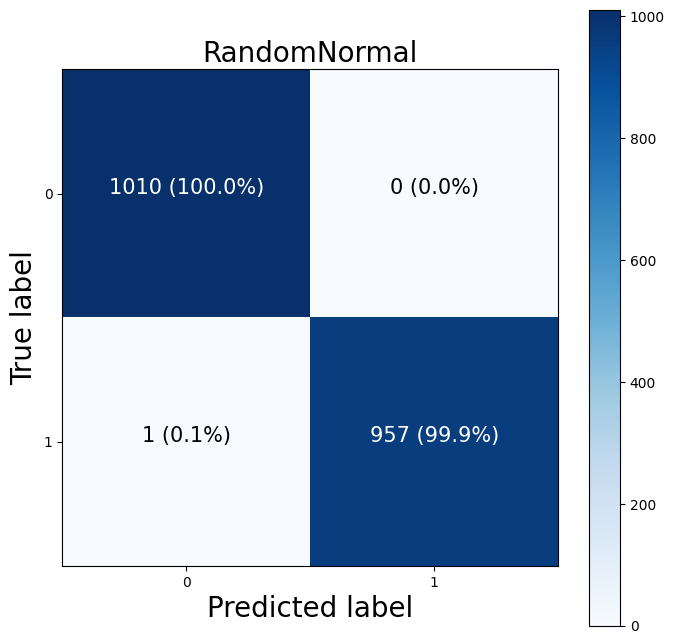

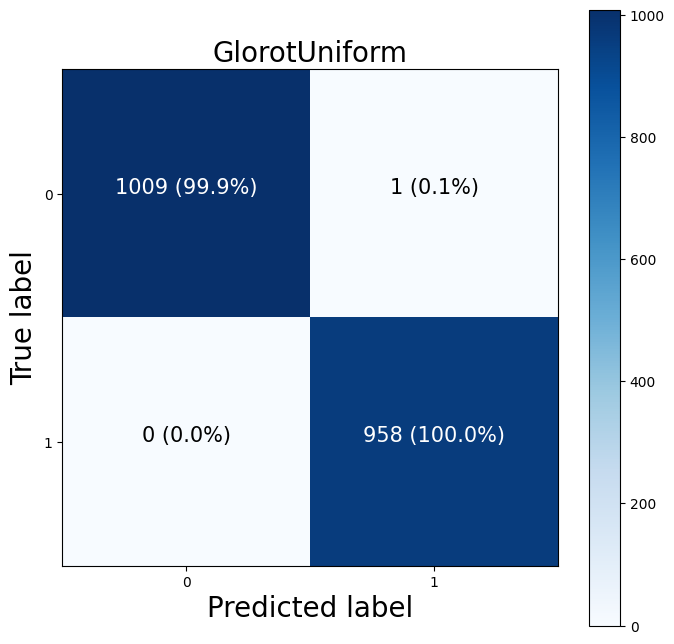

In [40]:
labels = ["GlorotNormal", "HeNormal", "RandomNormal","GlorotUniform"]
i=0
# Build and train models for each initializer
for initializer in initializers:
    
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_initializer=initializer),
        Dense(1, activation='sigmoid')
    ])
    model.summary()
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
     # Train the model
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=20, validation_split=0.2, verbose=0)
    
    # Evaluate on test data
    y_pred = np.round(model.predict(x_test))
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    draw_confusion_matrix(y_test, y_pred,labels[i])
    
    #confusion_matrices.append(confusion)
    learning_curves.append(history.history)
    accuracies.append(accuracy)
    i=i+1

### All of these initializers initializes the weights with a normal distribution centered around 0 but with difference in standard deviation. Glorot calculates standard deviation based on number of input units and output units, HE Normal calculates standard deviation with respect to number of input units and RandomNormal calculates std. as specified by the user. Here, He Normal performs the best with 100% accuracy. It performs better with ReLU activation function that has been used in the hidden layers.

0
1
2
3


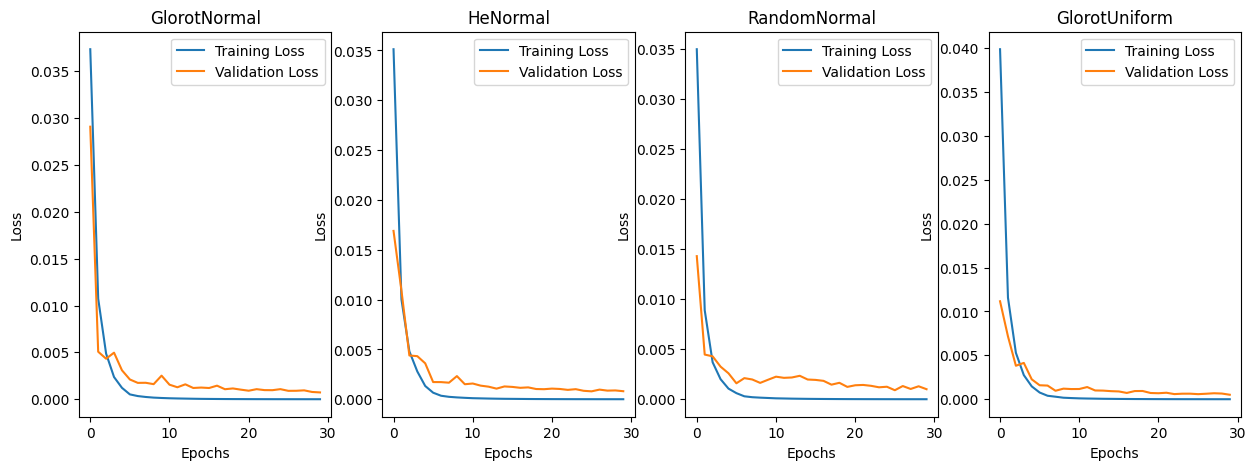

In [41]:
# Show learning curves
plt.figure(figsize=(15, 5))
for i, initializer in enumerate(initializers):
    print(i)
    plt.subplot(1, 4, i + 1)
    plt.plot(learning_curves[i]['loss'], label='Training Loss')
    plt.plot(learning_curves[i]['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(labels[i]) #'#({str(initializer)})')
    plt.legend()
    

### HeNormal shows a less erractic behavior as compared to Glorot and RandomNormal.
### HeNormal is also smoother after 10 epochs as compared to other initializers. RandomNormal is the most erratic throughout the epoch cycle.

In [42]:
len(accuracies)

4

In [43]:
accuracies

[0.9989837398373984, 1.0, 0.9994918699186992, 0.9994918699186992]

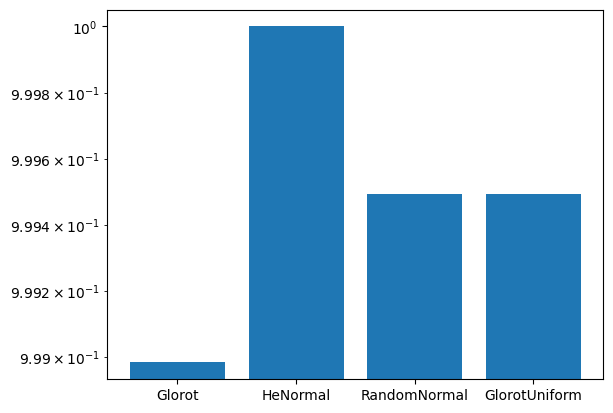

In [44]:
D = {u'Glorot':accuracies[0], u'HeNormal': accuracies[1], u'RandomNormal':accuracies[2], u'GlorotUniform':accuracies[3]}

plt.bar(range(len(D)), list(D.values()), align='center',log=True) # log scale is used for clear visibility
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

### In the above plot, HE Normal performs the best with the highest accuracy, followed by RandomNormal and GlorotUniform. 
### He Normal performs best with ReLU and Glorot performs best with sigmoid. Here, in the hidden layer ReLU is used, therefore, HeNormal performs better than the other. 

## Q 3. 10 - class classification of MNIST

In [57]:
# Load the MNIST dataset and select only digits 3 and 6
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [58]:
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [59]:
x_train, x_test = x_train / 255.0, x_test / 255.0 # normalize x_train in the range 0 to 1


In [60]:
# Build the Neural Network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

In [74]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [61]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [62]:
# Compiling the model .We use sparse categorical that will hot encode the classes internally.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [63]:
# Early stopping criteria based on validation loss
# patience = Number of epochs with no improvement after which training will be stopped.
# restore_best_weights = Whether to restore model weights from the epoch with the best value of the monitored quantity.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [64]:
# Training the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=20, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2875 - accuracy: 0.9175 - val_loss: 0.1539 - val_accuracy: 0.9578
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1271 - accuracy: 0.9634 - val_loss: 0.1077 - val_accuracy: 0.9690
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0879 - accuracy: 0.9744 - val_loss: 0.0967 - val_accuracy: 0.9713
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0669 - accuracy: 0.9798 - val_loss: 0.0896 - val_accuracy: 0.9737
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0503 - accuracy: 0.9854 - val_loss: 0.0887 - val_accuracy: 0.9742
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0378 - accuracy: 0.9888 - val_loss: 0.0930 - val_accuracy: 0.9719
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0873 - val_accuracy:

In [65]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 [==============================] - 0s 772us/step - loss: 0.0789 - accuracy: 0.9781
Test Accuracy: 0.9781000018119812


In [66]:
# Predict the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


313/313 [==============================] - 0s 686us/step


In [67]:
#draw_confusion_matrix(y_test, y_pred_classes,"classes")
# Construct a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 969    0    1    1    1    1    3    2    2    0]
 [   0 1120    4    2    0    1    3    1    4    0]
 [   2    0 1014    5    1    0    2    5    3    0]
 [   0    0    5  996    0    1    0    3    3    2]
 [   1    0    3    0  961    0    5    2    0   10]
 [   2    0    0   17    1  859    6    2    4    1]
 [   6    2    3    1    3    1  939    0    3    0]
 [   1    3   12    4    0    0    0 1002    3    3]
 [   3    0    5   11    4    1    1    4  942    3]
 [   1    3    0    6    7    3    0    9    1  979]]


## As per the above confusion matrix, mostly all the classes from 0-9 are classified correctly. Class 0 and 1 are the least misclassified. Class 5 is misclassified as class 3 for 17 times; Class 7 has been misclaasified as 2 for 12 times; Class 8 is misclassified as 3 for 11 times. 

In [69]:
# Display a classification report
class_report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



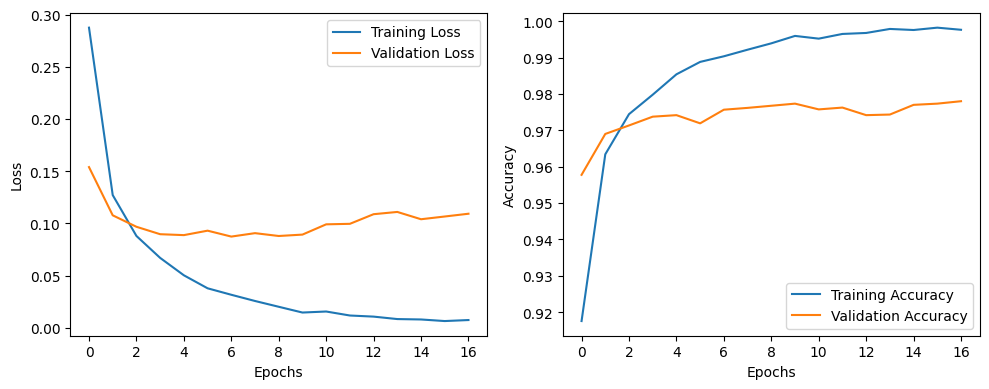

In [70]:
# Plot the learning curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 18ms/step


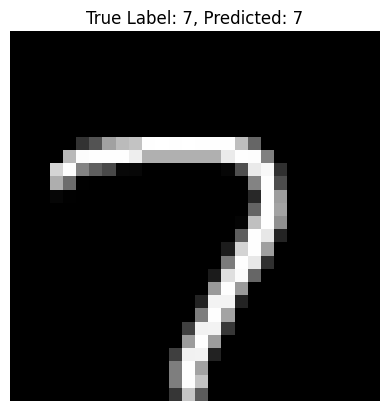

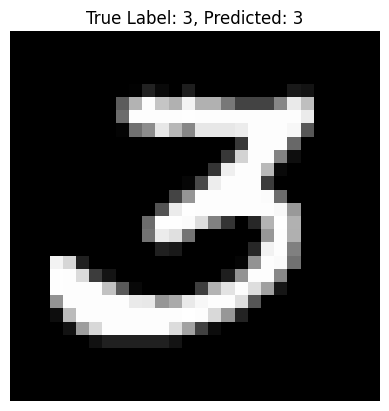

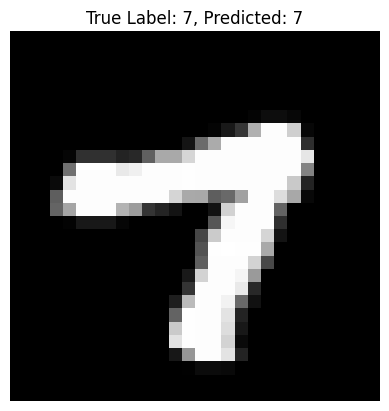

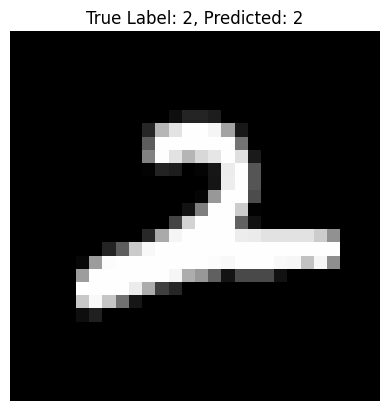

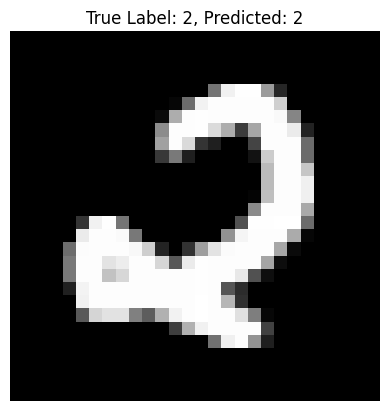

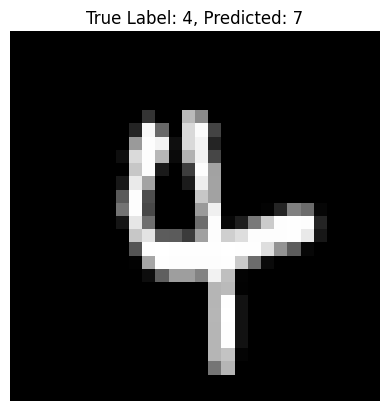

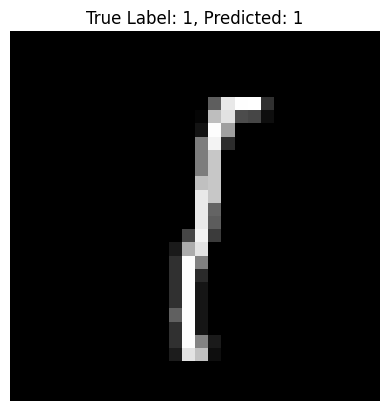

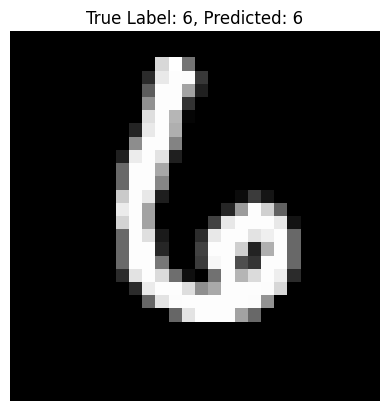

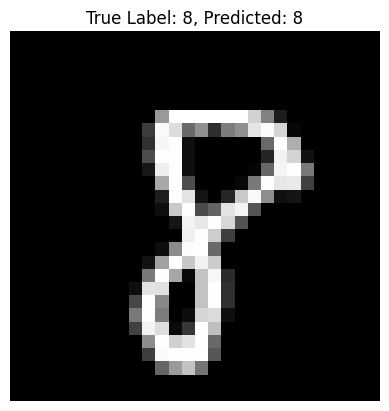

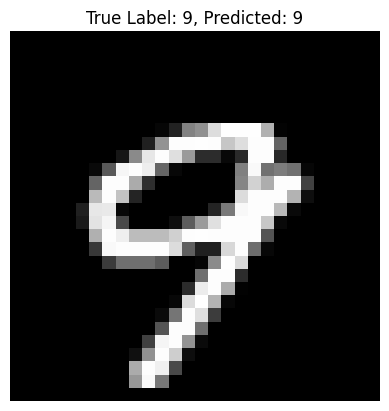

In [73]:
# Show some examples of predictions
eg_indices = np.random.choice(len(x_test), 10) # 10 randomly selected samples
eg_images = x_test[eg_indices]
eg_labels = y_test[eg_indices]
eg_predictions = model.predict(eg_images)
eg_predictions_classes = np.argmax(eg_predictions, axis=1)
for i in range(len(eg_images)):
    plt.figure()
    plt.imshow(eg_images[i], cmap='gray')
    plt.title(f"True Label: {eg_labels[i]}, Predicted: {eg_predictions_classes[i]}")
    plt.axis('off')
